#Importing TensorFlow

In [0]:
import tensorflow as tf

#Defining Tensors in TensorFlow
Everything in TensorFlow, whether it be integers, strings, floating point, or arrays, are defined as tensors. Tensors hold these value in a wrapper and overrides elementary operations(such as addition) for parallel execution. They are similar to numpy arrays as they also have a data type and shape. However, tensors can also reside in accelerator memory such as the GPU to allow parallel processing.

The following code creates a tensor with value 2 and shape 1,1 and prints it:


In [0]:
x = tf.Variable([1])
print(x)

<tf.Variable 'Variable:0' shape=(1,) dtype=int32, numpy=array([1], dtype=int32)>


#Overloaded elementary operations
Tensors also support elementary operations like addition, subtraction, multiplication and even matrix-multiplication inbuilt in them. The following code creates a tensor with a matrix of shape 2x2 and performs a multiplication and matrix multiplication operation on itself.

In [0]:
x = tf.Variable([ [2,2], [2,2] ])
multiplication = x*x
print(multiplication)
matrix_multiplication = tf.matmul(x,x)
print(matrix_multiplication)

tf.Tensor(
[[4 4]
 [4 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[8 8]
 [8 8]], shape=(2, 2), dtype=int32)


#Performance improvement in TensorFlow
tensors offer parallelization of computation which decreases execution time. The following code adds an array with 10 million elements with itself. First, we do it the normal python way with a list, and then we do the same operations with a Tensor variable which performs addition in parallel in the CPU.

In [0]:
import time
numbers = [i for i in range(100000000)]

x = numbers
start = time.time()
for value in x:
  value + value
end = time.time()
print("Time taken by python :",end-start,"seconds.")

tensor_x = tf.Variable(numbers)
start = time.time()
tensor_x + tensor_x
end = time.time()
print("Time taken by TensorFlow :",end-start,"seconds.")


Time taken by python : 7.049862384796143 seconds.
Time taken by TensorFlow : 0.0844111442565918 seconds.


#Performance difference between non-accelarated and accelarated code
The tensors we have created so far are computed in the CPU rather than being accelerated by the GPU available to us in Google Colab. We can see in which memory the tensor resides by its .device attribute on it :


In [0]:
x = tf.Variable([1])
print(x.device)

/job:localhost/replica:0/task:0/device:CPU:0


Even though tensors are fast as it is on CPU, we can further accelerate their performance by running them on the GPU. The code below shows the performance difference when we perform a matrix multiplication operation on itself. We have used tf.random.uniform to create a random array of size 10,000 x 10,000:

In [0]:
import time

start = time.time()
with tf.device('CPU:0'):
  tensor_x = tf.random.uniform([10000,10000])
  print(tensor_x.device)
  start = time.time()
  tf.matmul(tensor_x,tensor_x)
end = time.time()
print("Time taken by CPU :",end-start,"seconds.")

start = time.time()
with tf.device('GPU:0'):
  tensor_x = tf.random.uniform([10000,10000])
  print(tensor_x.device)
  start = time.time()
  tf.matmul(tensor_x,tensor_x)
end = time.time()
print("Time taken by GPU :",end-start,"seconds.")

/job:localhost/replica:0/task:0/device:CPU:0
Time taken by CPU : 28.631815671920776 seconds.
/job:localhost/replica:0/task:0/device:GPU:0
Time taken by GPU : 0.0037207603454589844 seconds.


#Tensorflow Gradient API
So far we have discussed the performance of TensorFlow and how it allows interoperability between CPU and accelerator hardware. TensorFlow also provides the GradientTape API which performs automatic differentiation of the variables we use in our program. This relieves the programmer from having to manually derive the differentials whose size may change based on the number of variables.

Let us try to use this API for performing automatic differentiation on an equation  $y = x^2$. The differential of y with respect to x, $dy/dx= 2x$ . for x = 2, the value of $dy/dx$ is 4.

To perform the same in TensorFlow using GradientTape, we use the following code:

In [0]:
x = tf.Variable([2.0])
with tf.GradientTape() as tape:
    y = x**2

print(tape.gradient(y, x))

tf.Tensor([4.], shape=(1,), dtype=float32)


#Toy linear regression model using TensorFlow Gradient API
The most common use case for TensorFlow is for creating deep learning pipelines. Tensorflow has many different APIs for creating powerful models in a few lines of code and train them. One of the key training component of any deep learning model is the gradient descent/back propagation algorithm, which is critical to train a model. These algorithms make heavy usage of differentiation to modify the weights and biases of the model. Having discussed the GradientTape API above, let us try to create a simple linear regression model which can be trained using gradient descent. We will be seeing the ease of implementation for the algorithm, especially their differentials in TensorFlow.

In linear regression, We first need a dataset which the model will learn. Here, we have created a dataset of the form y = 2x+3, the weight is 2 and bias is 3. We have initialized our weights and biases as 5 and 6 and then performed gradient descent on the model.

In [0]:
x_train = [0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]
y_train = [i*2+3 for i in x_train]
x_train = tf.Variable([x_train])
y_train = tf.Variable([y_train])
learning_rate = 0.001

weights = tf.Variable([[5.0]])
biases = tf.Variable([[6.0]])

def loss(actual, prediction):
    return tf.abs(actual - prediction)

for i in range(1000):

  with tf.GradientTape() as tape:

        prediction = tf.matmul(weights, x_train) + biases
        error = loss(y_train, prediction)
      
  weights_gradients, biases_gradients = tape.gradient(error, (weights, biases))
  
  weights = tf.Variable(weights - weights_gradients*learning_rate)
  biases = tf.Variable(biases - biases_gradients*learning_rate)

print(weights,biases)


<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.9479874]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[2.9999623]], dtype=float32)>


#Sequential API for model building
TensorFlow provides the Sequential API which allows the developers to create a model with various layers easily. This creates an empty Sequential model in which we will add various layers to make a simple model. Sequential models have a .add method using which we can add the layers in our model.

In [0]:
from tensorflow.keras.models import Sequential
seq_model = Sequential()

In [0]:
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten
seq_model.add( Input( shape=(28,28,1) ) )
seq_model.add( Conv2D(32,3,padding='same') )
seq_model.add( Conv2D(32,3,padding='same') )
seq_model.add( Flatten() )
seq_model.add( Dense(128, activation='relu') )
seq_model.add( Dense(10, activation='softmax') )

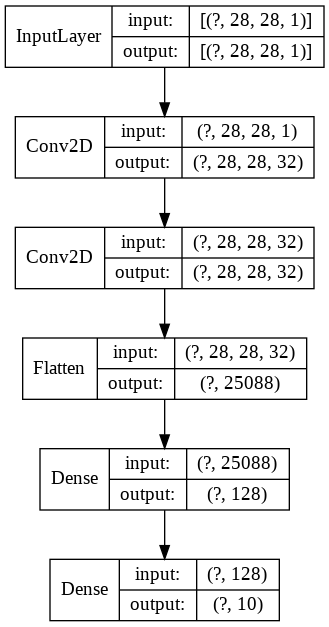

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(seq_model,show_layer_names=False,show_shapes=True)

#Model API for model building
Model API is another way of creating deep learning models just like in Sequential API, but it gives us a lot more flexibility to us in creating models by freeing us from the linear approach of the Sequential API. Let us first try to recreate the model we saw in the previous section to understand how the Model API works. The code shown below first imports the required modules and then constructs a model.

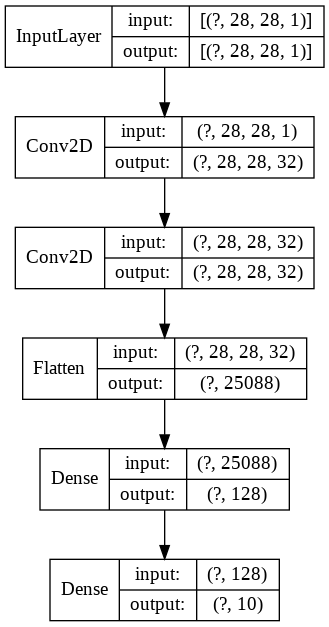

In [0]:
from tensorflow.keras.models import Model
inp = Input( shape=(28,28,1) )
x = Conv2D(32,3,padding='same')(inp)
x = Conv2D(32,3,padding='same')(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='relu')(x)
Model_model = Model(inp,output)

plot_model(Model_model,show_layer_names=False,show_shapes=True)

#Skip connections using Model API
While this may just seem like another way to create a model, we can leverage this to add some powerful architectural features to our model such as a skip connection from the first convolution layer to the last convolution by writing this code:

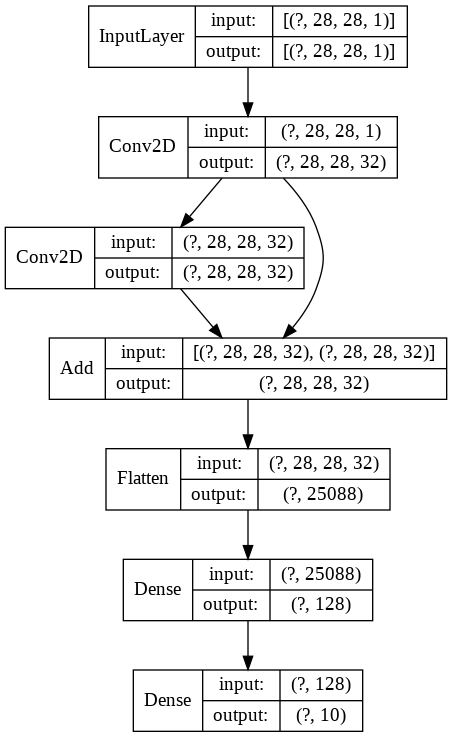

In [0]:
from tensorflow.keras.layers import Add
x = Input( shape=(28,28,1) )
x = Conv2D(32,3,padding='same')(inp)
shortcut = x
x = Conv2D(32,3,padding='same')(x)
x = Add()([shortcut,x])
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='relu')(x)
Model_model = Model(inp,output)
plot_model(Model_model,show_layer_names=False,show_shapes=True)

#Testing models on the MNIST dataset
Now that we have seen two different ways of creating a model, lets see the performance benefits of using a skip connection on the MNIST dataset.

##10x Conv2D model
First, we train a normal 10 layer deep sequential model on the MNIST dataset as follows:

In [0]:
from tensorflow.keras.layers import Add,Input,Conv2D,Dense,Flatten
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train / 255).reshape((x_train.shape[0], 28, 28, 1))
y_train = tf.keras.utils.to_categorical(y_train, 10)
x_test = (x_test / 255).reshape((x_test.shape[0], 28, 28, 1))
y_test = tf.keras.utils.to_categorical(y_test, 10)

depth = 10
seq_model = Sequential()
seq_model.add( Conv2D(32,3,padding='same',input_shape=(28,28,1)) )

for i in range(depth):
  seq_model.add( Conv2D(32,3,padding='same') )

seq_model.add( Flatten() )
seq_model.add( Dense( 128, activation='relu' ) )
seq_model.add( Dense( 10, activation='softmax') )

optim = Adam()
seq_model.compile(loss='categorical_crossentropy',optimizer=optim)
seq_model.fit(x_train,y_train,epochs=10)



`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.
11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 50s 835us/sample - loss: 0.2357
Epoch 2/10
60000/60000 [==============================] - 38s 639us/sample - loss: 0.1264
Epoch 3/10
60000/60000 [==============================] - 38s 638us/sample - loss: 0.1027
Epoch 4/10
60000/60000 [==============================] - 39s 650us/sample - loss: 186.0483
Epoch 5/10
60000/60000 [==============================] - 39s 655us/sample - loss: 2.5955
Epoch 6/10
60000/60000 [==============================] - 39s 658us/sample - loss: 2.4786
Epoch 7/10
60000/60000 [==============================] - 39s 654us/sample - loss: 2.2992
Epoch 8/10
60000/60000 [============================

##10x Conv2D model with skip connections
Now lets train another model having the same number of layers but with a skip connection from the first convolution to the last one as follows:

In [0]:
depth=10
inp = Input((28,28,1))
x = Conv2D(32,3,padding='same', activation='relu')(inp)
skip = x    # create skip connection…

for i in range(depth):
  x = Conv2D(32,3,padding='same', activation='relu')(x)

x = Add()([x,skip])   #… and add it to the final convolution
x = Flatten()(x)
x = Dense( 128, activation='relu' )(x)
x = Dense( 10, activation='softmax' )(x)

Model_model = Model(inputs=inp,outputs=x)
Model_model.compile(optimizer='adam',loss='categorical_crossentropy')
Model_model.fit(x_train,y_train,epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 729us/sample - loss: 0.1438
Epoch 2/10
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0421
Epoch 3/10
60000/60000 [==============================] - 43s 712us/sample - loss: 0.0222
Epoch 4/10
60000/60000 [==============================] - 43s 711us/sample - loss: 0.0130
Epoch 5/10
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0088
Epoch 6/10
60000/60000 [==============================] - 43s 715us/sample - loss: 0.0077
Epoch 7/10
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0053
Epoch 8/10
60000/60000 [==============================] - 43s 716us/sample - loss: 0.0038
Epoch 9/10
60000/60000 [==============================] - 43s 714us/sample - loss: 0.0052
Epoch 10/10
60000/60000 [==============================] - 43s 715us/sample - loss: 0.0024
